In [2]:
import numpy as np
from pyird.image.channel import image_to_channel_cube, channel_cube_to_image 
from pyird.image.channel import revert_channel_cube, eopixel_split, eopixel_split
from pyird.image.bias import bias_subtract
from pyird.utils import irdstream
import astropy.io.fits as pyf
import pathlib
import matplotlib.pyplot as plt

In [3]:
datadir=pathlib.Path("/home/kawahara/pyird/data/dark/")
anadir=pathlib.Path("/home/kawahara/pyird/data/dark/")
dark=irdstream.Stream2D("targets",datadir,anadir)
dark.fitsid=[41018]

/home/kawahara/pyird/data/dark IRDA000 


In [4]:
for datapath in dark.rawpath:
    im = pyf.open(str(datapath))[0].data
channel_cube=image_to_channel_cube(im)
bias_subtracted_channel_cube, bias=bias_subtract(channel_cube)

In [5]:
profile_o = np.median(bias_subtracted_channel_cube[7,:,:],axis=1)
profile_e = np.median(bias_subtracted_channel_cube[8,:,:],axis=1)

Clearly we see odd/even pixel patterns in each channel.

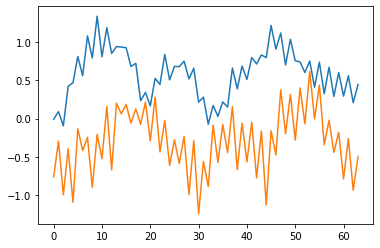

In [6]:
plt.plot(profile_e)
plt.plot(profile_o)

Also, the odd channel should be revereted to match the even channel profile.

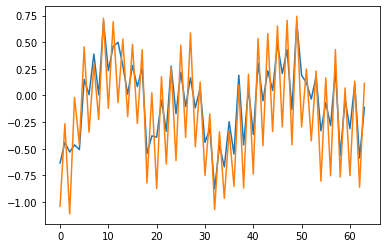

In [7]:
bias_subtracted_channel_cube_reverted=revert_channel_cube(bias_subtracted_channel_cube)
profile_o = np.median(bias_subtracted_channel_cube_reverted[7,:,:],axis=1)
profile_e = np.median(bias_subtracted_channel_cube_reverted[8,:,:],axis=1)

plt.plot(profile_e)
plt.plot(profile_o)
plt.show()

We split even/odd pixels in channel cube. The following does it and provide eop tensor.

In [11]:
eop=eopixel_split(bias_subtracted_channel_cube_reverted)
print(np.shape(eop)) #= (2 even/odd, Nchannel, ysize, xsize)

(2, 16, 32, 2048)


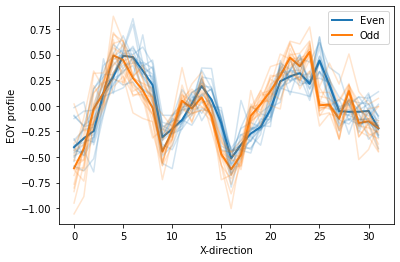

In [14]:
pf=np.median(eop,axis=3)
med=np.median(pf,axis=2)
pf=pf-med[:,:,np.newaxis] #median removed

plt.plot(np.median(pf,axis=1)[0,:],lw=2,alpha=1,color="C0",label="Even")
plt.plot(np.median(pf,axis=1)[1,:],lw=2,alpha=1,color="C1",label="Odd")
for i in range(0,int(np.shape(eop)[1])):
    plt.plot(pf[0,i,:],alpha=0.2,color="C0")
for i in range(0,int(np.shape(eop)[1])):
    plt.plot(pf[1,i,:],alpha=0.2,color="C1")

plt.legend()
plt.xlabel("X-direction")
plt.ylabel("EOY profile")
plt.show()